## Import Library

In [1]:
!pip install rdkit-pypi

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- Fingerprint
from rdkit.Chem import MACCSkeys
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PandasTools

#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [3]:
import rdkit
import pandas as pd

print(f"RDKit version: {rdkit.__version__}")
print(f"pandas version: {pd.__version__}")


RDKit version: 2022.09.5
pandas version: 2.2.2


In [4]:
from rdkit.Chem import PandasTools
PandasTools.InstallPandasTools()

## Input Dataset & Seleksi Kolom SMILES

In [5]:
dataset = pd.read_csv('hsp90_05_label2class_pIC50.csv')

selection = ['canonical_smiles','pIC50']
dataset = dataset[selection]
dataset.to_csv('input_deskriptor.csv', index=False)

In [6]:
dataset = pd.read_csv('input_deskriptor.csv')
dataset.head()

,canonical_smiles,pIC50
0,CCCCn1c(Cc2ccc3c(c2)OCO3)nc2c(N)nc(F)nc21,4.767004
1,COc1ccc(OC)c(Cc2nc3nc(F)nc(N)c3[nH]2)c1,4.271646
2,C#CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2Cl)nc2c(N)nc(F)...,4.522879
3,C[C@@H]1C[C@H]2O[C@@H]2/C=C\C=C\C(=O)Cc2c(Cl)c...,6.698970
4,CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2Cl)nc2c(N)ncnc21,3.698970


## Menambahkan Kolom Struktur 2D pada Dataframe

In [7]:
# Include 2D structure of molecules
# https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/PandasTools.py
PandasTools.AddMoleculeColumnToFrame(dataset,'canonical_smiles', 'Structure')
dataset

Failed to patch pandas - unable to change molecule rendering


,canonical_smiles,pIC50,Structure
0,CCCCn1c(Cc2ccc3c(c2)OCO3)nc2c(N)nc(F)nc21,4.767004,<rdkit.Chem.rdchem.Mol object at 0x7b10295bee30>
1,COc1ccc(OC)c(Cc2nc3nc(F)nc(N)c3[nH]2)c1,4.271646,<rdkit.Chem.rdchem.Mol object at 0x7b10295bf140>
2,C#CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2Cl)nc2c(N)nc(F)...,4.522879,<rdkit.Chem.rdchem.Mol object at 0x7b10295bf0d0>
3,C[C@@H]1C[C@H]2O[C@@H]2/C=C\C=C\C(=O)Cc2c(Cl)c...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b10295bf060>
4,CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2Cl)nc2c(N)ncnc21,3.698970,<rdkit.Chem.rdchem.Mol object at 0x7b10295bef80>
...,...,...,...
876,CC(C)c1cc(C(=O)N2CCc3c(sc4nc(-c5ccc(NC(=O)Nc6c...,6.437707,<rdkit.Chem.rdchem.Mol object at 0x7b10285395b0>
877,CC(C)c1cc(C(=O)N2CCc3c(sc4nc(-c5ccc(NC(=O)Nc6c...,7.161151,<rdkit.Chem.rdchem.Mol object at 0x7b1028539620>
878,CN1CCN(/C=C/C(=O)/C=C/c2cccc(O[Si](C)(C)C(C)(C...,6.728158,<rdkit.Chem.rdchem.Mol object at 0x7b1028539690>
879,CCCC[C@@H]1C[C@@H]2C(C(=O)OCC(C)C)=C(O)[C@H](C...,4.339135,<rdkit.Chem.rdchem.Mol object at 0x7b1028539700>


## Visualisasi SD Bentuk Grid

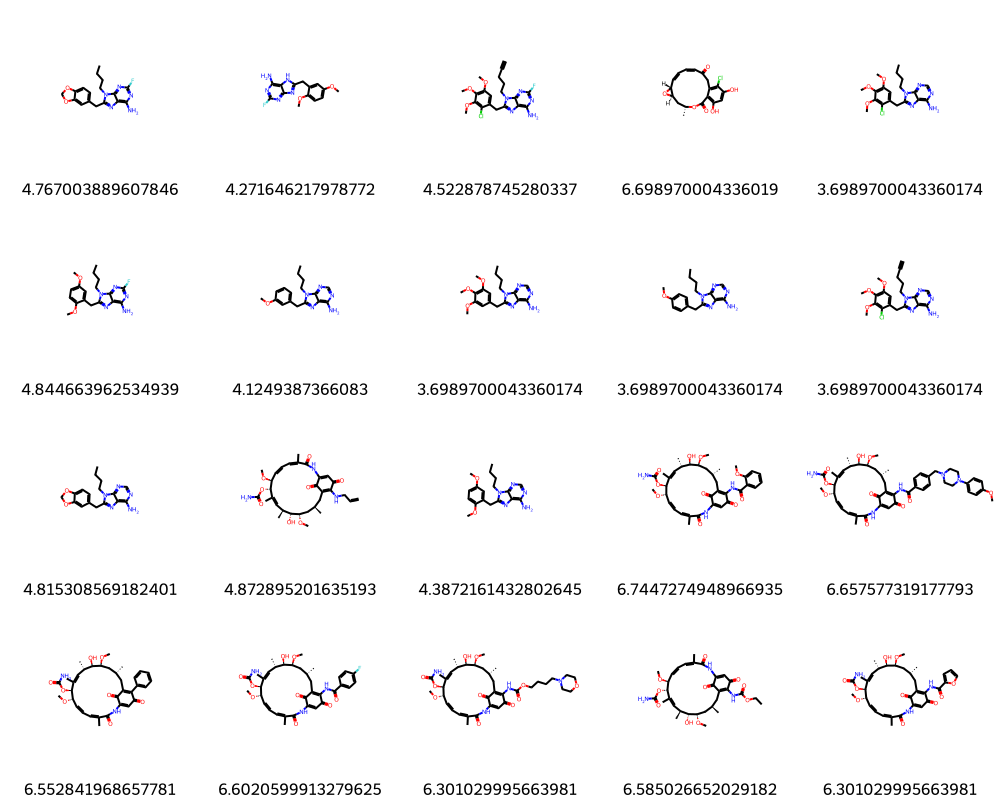

In [8]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset["Structure"]][:20], maxMols=100,legends=[str(x) for x in dataset.pIC50], subImgSize=(200,200), molsPerRow=5)

# Generate Fingerprint
## MACC-Keys

In [9]:
MACC = MACCSkeys.GenMACCSKeys(dataset.Structure[0])

In [10]:
print("Array bits: /n", np.array(MACC))
print("Jumlah bits yang digunakan: ",len(MACC))
print("Ukuran bits MACC: ",np.array(MACC).shape)
print("Index fingerprint yang aktif: \n",tuple(MACC.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(MACC.GetOnBits()))

Array bits: /n [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
Jumlah bits yang digunakan:  167
Ukuran bits MACC:  (167,)
Index fingerprint yang aktif: 
 (28, 38, 42, 57, 65, 72, 75, 77, 79, 80, 83, 84, 85, 87, 96, 98, 100, 101, 105, 106, 107, 109, 111, 113, 114, 115, 116, 118, 120, 121, 122, 123, 125, 128, 129, 133, 134, 135, 137, 138, 142, 144, 145, 147, 148, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165)
Jumlah fingerprint yang aktif:  60


## Avalon

In [11]:
Avalon = pyAvalonTools.GetAvalonFP(dataset.Structure[0], nBits=512)

In [12]:
print("Array bits: /n", np.array(Avalon))
print("Jumlah bits yang digunakan: ",len(Avalon))
print("Ukuran bits MACC: ",np.array(Avalon).shape)
print("Index fingerprint yang aktif: \n",tuple(Avalon.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(Avalon.GetOnBits()))

Array bits: /n [1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0
 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0
 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0
 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1

## Atom-Pair

In [13]:
At_P = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(dataset.Structure[0], nBits=512)

In [14]:
print("Array bits: /n", np.array(At_P))
print("Jumlah bits yang digunakan: ",len(At_P))
print("Ukuran bits Atom Pairs: ",np.array(At_P).shape)
print("Index fingerprint yang aktif: \n",tuple(At_P.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(At_P.GetOnBits()))

Array bits: /n [1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1
 1 0 0 1 1

## Topologi-Torsi

In [15]:
ToTo = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(dataset.Structure[0], nBits=512)

In [16]:
print("Array bits: /n", np.array(ToTo))
print("Jumlah bits yang digunakan: ",len(ToTo))
print("Ukuran bits Topologi-Torsi: ",np.array(ToTo).shape)
print("Index fingerprint yang aktif: \n",tuple(ToTo.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(ToTo.GetOnBits()))

Array bits: /n [1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

## Morgan Circular

In [17]:
onbits = {}
morgan = AllChem.GetMorganFingerprintAsBitVect(dataset.Structure[0], 2, nBits=512, bitInfo=onbits)

In [18]:
print("Array bits: /n", np.array(morgan))
print("Jumlah bits yang digunakan: ",len(morgan))
print("Ukuran bits MORGAN: ",np.array(morgan).shape)
print("Index fingerprint yang aktif: \n",tuple(morgan.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(morgan.GetOnBits()))

Array bits: /n [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

Visual salah satu finger print yang aktif pada Bits: 


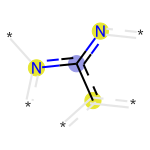

In [19]:
print("Visual salah satu finger print yang aktif pada Bits: ")
Draw.DrawMorganBit(dataset.Structure[0], 160, onbits)

Visual semua fingerprint yang aktif pada Bits: 


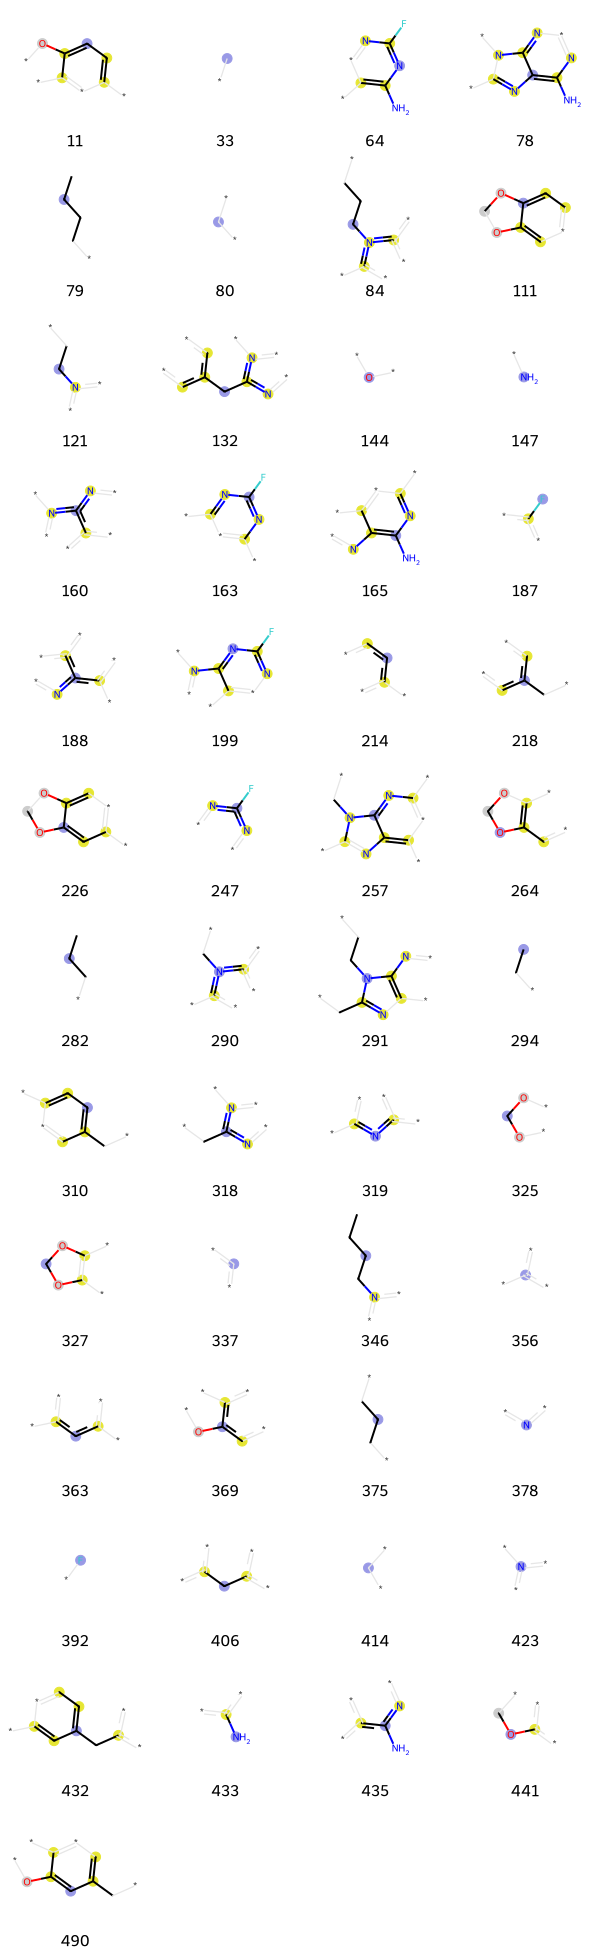

In [20]:
print("Visual semua fingerprint yang aktif pada Bits: ")
all_fragments = [(dataset.Structure[0], x, onbits) for x in morgan.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in morgan.GetOnBits()][:])

## RDkit

In [21]:
rdkbi = {}
RDkit = AllChem.RDKFingerprint(dataset.Structure[0], maxPath=5, fpSize=512, bitInfo=rdkbi)

In [22]:
print("Array bits: /n", np.array(RDkit))
print("Jumlah bits yang digunakan: ",len(RDkit))
print("Ukuran bits RDkit: ",np.array(RDkit).shape)
print("Index fingerprint yang aktif: \n",tuple(RDkit.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(RDkit.GetOnBits()))

Array bits: /n [1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 0

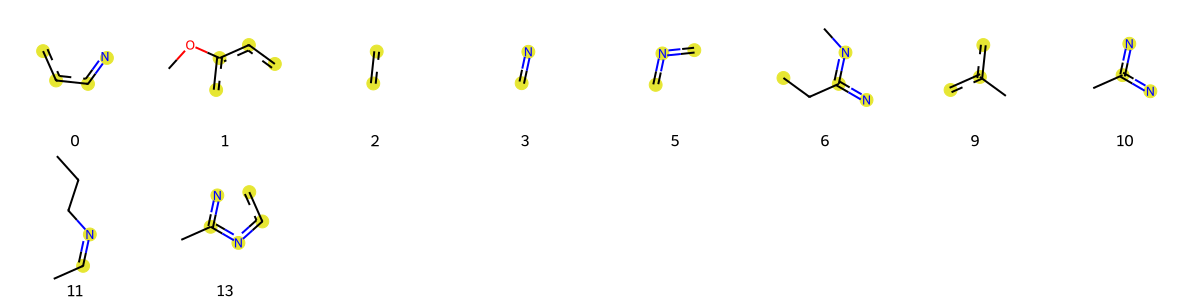

In [23]:
# Visualize more fragments
fragments = [(dataset.Structure[0], x, rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(fragments[:10],molsPerRow=8,legends=[str(x) for x in rdkbi][:10])

# Data Engineering - Set all into function

In [24]:
# function definition
def generate_fpts(data): #, maxPath=5, fpSize=512, bitInfo=rdkbi):
    # create empty lists to store fingerprints

    # MACCS-keys fingerprint
    Mkeys = []

    # Morgan fingerprint
    Mfpts = []
    morBits ={}

    # Avalon fingerprint
    Avfpts = []

    # Topological Torsion fingerprint
    TT_fpts = []

    # Atom-Pair fingerprint
    APs = []

    # RDKit fingerprnt
    Rdk = []
    rdkBits = {}

    for mol in tqdm(data):
        # Calculation MACCS-keys fingerprints
        mkey = MACCSkeys.GenMACCSKeys(mol)
        Mkeys.append(mkey)

        # Calculate Morgan fingerprints and append to the empty list above
        mfpt = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048, bitInfo=morBits)
        Mfpts.append(mfpt)

        # Calculate Avalon fingerprints and append to the empty list above
        Avfpt = pyAvalonTools.GetAvalonFP(mol, nBits=2048)
        Avfpts.append(Avfpt)

        #calculate TopologicalTorsion fingerprints and append to the empty list above
        TT_fpt = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=2048)
        TT_fpts.append(TT_fpt)

        # Calculate Atom-Pair fingerprints
        ap = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=512)
        APs.append(ap)

        # Calculate RDKit fingerprint
        rdk = AllChem.RDKFingerprint(mol, maxPath=5, fpSize=512, bitInfo=rdkBits)
        Rdk.append(rdk)

    return np.array(Mkeys), np.array(Mfpts), np.array(Avfpts), np.array(TT_fpts), np.array(APs), np.array(Rdk), morBits, rdkBits

def output_results():
    print("MACCS-keys fingerprints: ", mkey.shape, ' --- ',"Number of On bits: ",np.count_nonzero(mkey), "\nMorgan fingerprints: ",mfpts.shape, ' --- ',"Number of On bits: ",np.count_nonzero(mfpts), "\nAvalon fingerprints: ", Avfpts.shape, ' --- ',"Number of On bits: ",np.count_nonzero(Avfpts), "\nTopological fingerprints: ",TT_fpts.shape, ' --- ',"Number of On bits: ",np.count_nonzero(TT_fpts), "\nATom Pair fingerprints: ", ap.shape, ' --- ',"Number of On bits: ",np.count_nonzero(ap), "\nRDKit fingerprints: ", rdk.shape, ' --- ',"Number of On bits: ",np.count_nonzero(rdk))

def fragment_Onbit(x): # x = mkey, mfpts, Avfpts, TT_fpts, ap, rdk
    print("Index of On bits:", np.nonzero(x))

## Call Function

In [25]:
# function call on structure
mkey, mfpts, Avfpts, TT_fpts, ap, rdk, morBits, rdkBits  = generate_fpts(dataset.Structure[:3])

# function call all structure
#mkey, mfpts, Avfpts, TT_fpts, ap, rdk, morBits, rdkBits  = generate_fpts(dataset.Structure[:len(dataset)])

100%|██████████| 3/3 [00:00<00:00, 72.84it/s]


## Resume results

In [26]:
output_results()

MACCS-keys fingerprints:  (3, 167)  ---  Number of On bits:  172 
Morgan fingerprints:  (3, 2048)  ---  Number of On bits:  151 
Avalon fingerprints:  (3, 2048)  ---  Number of On bits:  1047 
Topological fingerprints:  (3, 2048)  ---  Number of On bits:  150 
ATom Pair fingerprints:  (3, 512)  ---  Number of On bits:  624 
RDKit fingerprints:  (3, 512)  ---  Number of On bits:  888


## Bits thats contribute to that structure on

In [27]:
fragment_Onbit(mfpts)

Index of On bits: (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), array([  80,  257,  294,  310,  318,  378,  441,  576,  591,  656,  675,
        699,  738,  794,  802,  868,  875,  926,  935,  944, 1035, 1057,
       1102, 1145, 1171, 1223, 1349, 1380, 1430, 1457, 1459, 1465, 1514,
       1620, 1647, 1668, 1696, 1701, 1724, 1750, 1754, 1783, 1800, 1827,
       1855, 1863, 1873, 1882, 1905, 1911, 1928,    4,   80,   81,   83,
         94,  249,  322,  378,  576,  600,  675,  695,  699,  718,  781,
        841,  875, 1057, 1114, 1149, 11

## Draw Morgan On Bit for single structure and single fingerprint

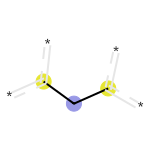

In [28]:
Draw.DrawMorganBit(dataset.Structure[0], 318, morBits)

## Draw RDKit On Bit for single structure and single fingerprint

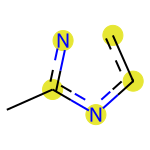

In [29]:
Draw.DrawRDKitBit(dataset.Structure[0], 13, rdkBits)

# Tanimoto & Klustering

## 1. Mencari senyawa yang mirip dengan kueri atau senyawa tertentu
### menggunakan senyawa yang telah dikenal sebagai inhibitor HSP90 : Geldanamycin

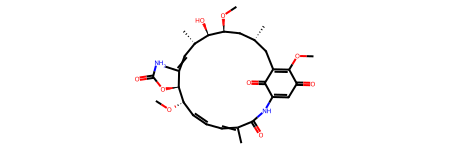

In [30]:
# Menghitung fingerprint untuk senyawa query
query = AllChem.MolFromSmiles('C[C@H]1C[C@@H]([C@@H]([C@H](/C=C(/[C@@H]([C@H](/C=C\C=C(\C(=O)NC2=CC(=O)C(=C(C1)C2=O)OC)/C)OC)OC(=O)N)\C)C)O)OC')
query_fps = AllChem.GetMorganFingerprintAsBitVect(query, 2, nBits=4096)
query

In [31]:
# Menghitung fingerprint seluruh dataset(total 4732)
all_Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) for mol in dataset.Structure]
len(all_Mfpts)

881

In [32]:
# Menghitung Tanimoto coefficient dari senyawa query dan membandingkannya dengan tiap senyawa pad dataset
# Simpan semuanya di dalam list
Tanimoto_similarity = [DataStructs.FingerprintSimilarity(query_fps, x, metric=DataStructs.TanimotoSimilarity) for x in all_Mfpts]

In [33]:
# Menyimpan dataset kedalam variabel baru - agar tidak mengganggu dataset awal
dataset_sim = dataset

In [34]:
# Menambahkan kolom tanimoto_values pada dataset
dataset_sim["tanimoto_values"] = Tanimoto_similarity

In [35]:
# Mengurutkan dataset
dataset_sorted = dataset.sort_values(['tanimoto_values'],ascending=False)
dataset_sorted

,canonical_smiles,pIC50,Structure,tanimoto_values
39,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b10295bdfc0>,1.000000
15,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3ccccc3)...,6.552842,<rdkit.Chem.rdchem.Mol object at 0x7b10295bea40>,0.790123
18,CCOC(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@...,6.585027,<rdkit.Chem.rdchem.Mol object at 0x7b10295be8f0>,0.761905
239,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)...,7.754487,<rdkit.Chem.rdchem.Mol object at 0x7b1028507c30>,0.761905
11,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,4.872895,<rdkit.Chem.rdchem.Mol object at 0x7b10295bec00>,0.752941
...,...,...,...,...
457,OCCN(CCO)c1nc(N2CCCCC2)c2nc(N(CCO)CCO)nc(N3CCC...,4.676373,<rdkit.Chem.rdchem.Mol object at 0x7b102852dcb0>,0.030928
352,Oc1ccc(-c2nc(-c3ccc(O)c(O)c3)cs2)cc1,6.130534,<rdkit.Chem.rdchem.Mol object at 0x7b102852ae30>,0.030928
535,N#Cc1ccc(CSc2nnc(Nc3ccccc3)s2)cc1,4.301030,<rdkit.Chem.rdchem.Mol object at 0x7b102852fed0>,0.028037
367,c1ccc2[nH]c(SCc3ccc(-c4nnco4)cc3)nc2c1,4.301030,<rdkit.Chem.rdchem.Mol object at 0x7b102852b4c0>,0.027523


In [36]:
# Memfilter beradsarkan threshold tertentu
dataset_sorted[dataset_sorted['tanimoto_values'] >= 0.5]

,canonical_smiles,pIC50,Structure,tanimoto_values
39,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b10295bdfc0>,1.000000
15,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3ccccc3)...,6.552842,<rdkit.Chem.rdchem.Mol object at 0x7b10295bea40>,0.790123
18,CCOC(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@...,6.585027,<rdkit.Chem.rdchem.Mol object at 0x7b10295be8f0>,0.761905
239,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)...,7.754487,<rdkit.Chem.rdchem.Mol object at 0x7b1028507c30>,0.761905
11,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,4.872895,<rdkit.Chem.rdchem.Mol object at 0x7b10295bec00>,0.752941
33,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3cccs3)=...,6.602060,<rdkit.Chem.rdchem.Mol object at 0x7b10295be260>,0.752941
24,COc1ccc(C(=O)NC2=C3C[C@@H](C)C[C@H](OC)[C@H](O...,6.397940,<rdkit.Chem.rdchem.Mol object at 0x7b10295be650>,0.747126
37,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NC(=O)c3c...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b10295be0a0>,0.744186
36,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NC(=O)OCC...,6.920819,<rdkit.Chem.rdchem.Mol object at 0x7b10295be110>,0.735632
13,COc1ccccc1C(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H]...,6.744727,<rdkit.Chem.rdchem.Mol object at 0x7b10295beb20>,0.730337


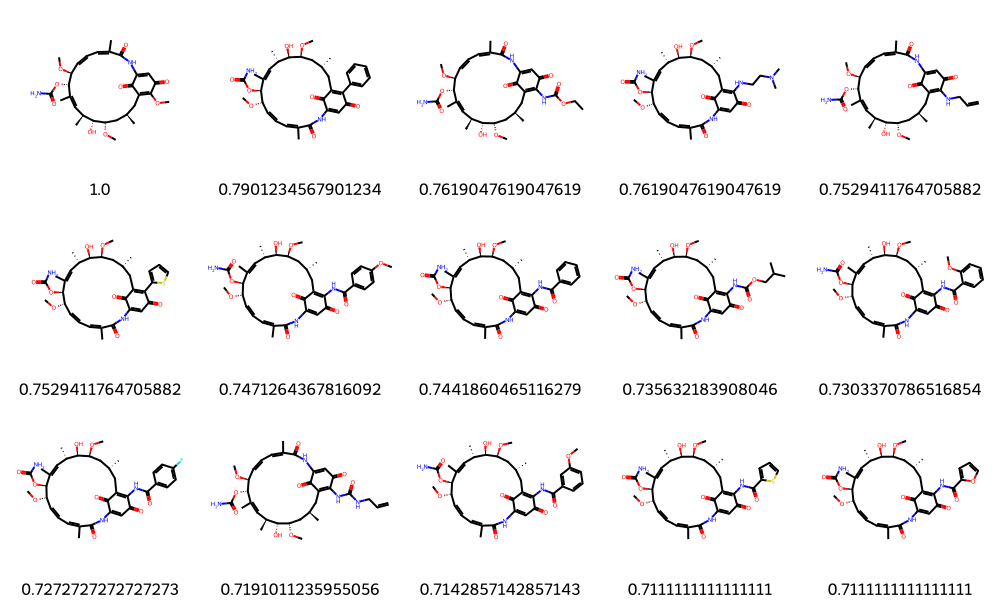

In [37]:
# Display structures and Tanimoto coefficient values
Draw.MolsToGridImage([x for x in dataset_sorted["Structure"]][:15], maxMols=100,
                     legends=[str(x) for x in dataset_sorted.tanimoto_values], subImgSize=(200,200), molsPerRow=5)

## Rangkuman Hasil

In [38]:
import pandas as pd
from rdkit.Chem import Draw

# 1. Find the top 5 compounds with the highest Tanimoto similarity
top_5 = dataset_sorted.head(5)
top_5_df = pd.DataFrame(top_5)
print("Top 10 Compounds with Highest Tanimoto Similarity:")
display(top_5_df)

# 2. Display the structures of compounds with Tanimoto similarity >= 0.7
high_similarity_compounds = dataset_sorted[dataset_sorted['tanimoto_values'] >= 0.7]
high_similarity_compounds_df = pd.DataFrame(high_similarity_compounds)
print("\nCompounds with Tanimoto Similarity >= 0.7:")
display(high_similarity_compounds_df)

Draw.MolsToGridImage([x for x in high_similarity_compounds["Structure"]],
                     legends=[str(x) for x in high_similarity_compounds.tanimoto_values],
                     subImgSize=(200, 200), molsPerRow=5)

# 3. Find the average pIC50 for compounds with Tanimoto similarity > 0.6
average_pic50 = dataset_sorted[dataset_sorted['tanimoto_values'] > 0.6]['pIC50'].mean()
average_pic50_df = pd.DataFrame({'Metric': ['Average pIC50'], 'Value': [average_pic50]})
print("\nAverage pIC50 for compounds with Tanimoto similarity > 0.6:")
display(average_pic50_df)

# 4. Find the compound with the highest pIC50 among those with Tanimoto similarity > 0.5
highest_pic50_compound = dataset_sorted[dataset_sorted['tanimoto_values'] > 0.5].sort_values(by='pIC50', ascending=False).iloc[0]
highest_pic50_df = pd.DataFrame([highest_pic50_compound]).T
print("\nCompound with highest pIC50 (among those with Tanimoto > 0.5):")
display(highest_pic50_df)

# 5. Statistical summary of Tanimoto coefficients for all compounds
tanimoto_stats = dataset_sorted['tanimoto_values'].describe()
tanimoto_stats_df = tanimoto_stats.reset_index()
tanimoto_stats_df.columns = ['Statistic', 'Value']
print("\nStatistical Summary of Tanimoto Coefficients:")
display(tanimoto_stats_df)

Top 10 Compounds with Highest Tanimoto Similarity:


,canonical_smiles,pIC50,Structure,tanimoto_values
39,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b10295bdfc0>,1.000000
15,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3ccccc3)...,6.552842,<rdkit.Chem.rdchem.Mol object at 0x7b10295bea40>,0.790123
18,CCOC(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@...,6.585027,<rdkit.Chem.rdchem.Mol object at 0x7b10295be8f0>,0.761905
239,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)...,7.754487,<rdkit.Chem.rdchem.Mol object at 0x7b1028507c30>,0.761905
11,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,4.872895,<rdkit.Chem.rdchem.Mol object at 0x7b10295bec00>,0.752941



Compounds with Tanimoto Similarity >= 0.7:


,canonical_smiles,pIC50,Structure,tanimoto_values
39,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b10295bdfc0>,1.000000
15,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3ccccc3)...,6.552842,<rdkit.Chem.rdchem.Mol object at 0x7b10295bea40>,0.790123
18,CCOC(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@...,6.585027,<rdkit.Chem.rdchem.Mol object at 0x7b10295be8f0>,0.761905
239,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)...,7.754487,<rdkit.Chem.rdchem.Mol object at 0x7b1028507c30>,0.761905
11,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,4.872895,<rdkit.Chem.rdchem.Mol object at 0x7b10295bec00>,0.752941
33,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(c3cccs3)=...,6.602060,<rdkit.Chem.rdchem.Mol object at 0x7b10295be260>,0.752941
24,COc1ccc(C(=O)NC2=C3C[C@@H](C)C[C@H](OC)[C@H](O...,6.397940,<rdkit.Chem.rdchem.Mol object at 0x7b10295be650>,0.747126
37,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NC(=O)c3c...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b10295be0a0>,0.744186
36,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NC(=O)OCC...,6.920819,<rdkit.Chem.rdchem.Mol object at 0x7b10295be110>,0.735632
13,COc1ccccc1C(=O)NC1=C2C[C@@H](C)C[C@H](OC)[C@H]...,6.744727,<rdkit.Chem.rdchem.Mol object at 0x7b10295beb20>,0.730337



Average pIC50 for compounds with Tanimoto similarity > 0.6:


,Metric,Value
0,Average pIC50,6.417548



Compound with highest pIC50 (among those with Tanimoto > 0.5):


,239
canonical_smiles,CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)...
pIC50,7.754487
Structure,<rdkit.Chem.rdchem.Mol object at 0x7b1028507c30>
tanimoto_values,0.761905



Statistical Summary of Tanimoto Coefficients:


,Statistic,Value
0,count,881.000000
1,mean,0.101429
2,std,0.119298
3,min,0.018182
4,25%,0.063636
5,50%,0.076271
6,75%,0.095238
7,max,1.000000


## Import

In [39]:
#--------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import ShuffleSplit, cross_validate,train_test_split
#--------------------------------------------------------
from lightgbm import LGBMRegressor

In [40]:
dataset = pd.read_csv('input_deskriptor.csv')
dataset.head()

,canonical_smiles,pIC50
0,CCCCn1c(Cc2ccc3c(c2)OCO3)nc2c(N)nc(F)nc21,4.767004
1,COc1ccc(OC)c(Cc2nc3nc(F)nc(N)c3[nH]2)c1,4.271646
2,C#CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2Cl)nc2c(N)nc(F)...,4.522879
3,C[C@@H]1C[C@H]2O[C@@H]2/C=C\C=C\C(=O)Cc2c(Cl)c...,6.698970
4,CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2Cl)nc2c(N)ncnc21,3.698970


In [41]:
dataset.shape

(881, 2)

## Add kolom struktur kedalam dataset

In [42]:
# Include 2D structure of molecules
PandasTools.AddMoleculeColumnToFrame(dataset,'canonical_smiles','Stucture',includeFingerprints=True)

Failed to patch pandas - unable to change molecule rendering


In [43]:
dataset.head()

,canonical_smiles,pIC50,Stucture
0,CCCCn1c(Cc2ccc3c(c2)OCO3)nc2c(N)nc(F)nc21,4.767004,<rdkit.Chem.rdchem.Mol object at 0x7b101f296c70>
1,COc1ccc(OC)c(Cc2nc3nc(F)nc(N)c3[nH]2)c1,4.271646,<rdkit.Chem.rdchem.Mol object at 0x7b101f296ab0>
2,C#CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2Cl)nc2c(N)nc(F)...,4.522879,<rdkit.Chem.rdchem.Mol object at 0x7b101f296b20>
3,C[C@@H]1C[C@H]2O[C@@H]2/C=C\C=C\C(=O)Cc2c(Cl)c...,6.698970,<rdkit.Chem.rdchem.Mol object at 0x7b101f296d50>
4,CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2Cl)nc2c(N)ncnc21,3.698970,<rdkit.Chem.rdchem.Mol object at 0x7b101f296ea0>


## Generate Avalon Finger Print dari dataset kolom struktur

In [44]:
def generate_AVfpts(data):

    # Store fingerprints using empty lists

    Avalon_fpts = []

    # Here no need to generate mol files
    # We can directly use the structure column of the data frame
    # mols = [Chem.MolFromSmiles(x) for x in data if x is not None]
    for mol in tqdm(data):


        #=============================
        # calculate Avalon fingerprints
        #=============================
        avfpts = pyAvalonTools.GetAvalonFP(mol, nBits=4096)
        Avalon_fpts.append(avfpts)


    #=====append=========================
    # return the lists as numpy array
    #====================================
    return np.array(Avalon_fpts)

In [45]:
# Function call
Avalon_fpts = generate_AVfpts(dataset['Stucture'])

100%|██████████| 881/881 [00:03<00:00, 257.71it/s]


## Add seluruh kolom finger print kedalam dataset

In [46]:
# Put Avalon fingerprints into Dataframe
Avalon_fingerprints = pd.DataFrame(Avalon_fpts, columns=['Col_A_{}'.format(i + 1)
                                                        for i in range(Avalon_fpts.shape[1])])

Avalon_fingerprints.head()

,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_4087,Col_A_4088,Col_A_4089,Col_A_4090,Col_A_4091,Col_A_4092,Col_A_4093,Col_A_4094,Col_A_4095,Col_A_4096
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Memulai model

In [47]:
!pip install catboost

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import warnings
import matplotlib.patches as mpatches

## Menggunakan Train Test Split Avalon

In [49]:
X_train_av, X_test_av, y_train_av, y_test_av = train_test_split(Avalon_fingerprints,
                                                    dataset.pIC50,test_size=0.3,random_state=42)

In [50]:
# Include 2D structure of molecules
PandasTools.AddMoleculeColumnToFrame(dataset,'canonical_smiles','Structure',includeFingerprints=True)

Failed to patch pandas - unable to change molecule rendering


100%|██████████| 881/881 [00:02<00:00, 430.86it/s]


LGBM MAE: 0.48
LGBM R^2: 0.7
RandomForest MAE: 0.42
RandomForest R^2: 0.76
KNN MAE: 0.47
KNN R^2: 0.7
DecisionTree MAE: 0.53
DecisionTree R^2: 0.56
XGBoost MAE: 0.47
XGBoost R^2: 0.71
CatBoost MAE: 0.43
CatBoost R^2: 0.75
LinearRegression MAE: 0.83
LinearRegression R^2: 0.19
SVR MAE: 0.43
SVR R^2: 0.72

Best Model: RandomForest
Best R^2: 0.7559840107110121
Best MAE: 0.42396440838277194


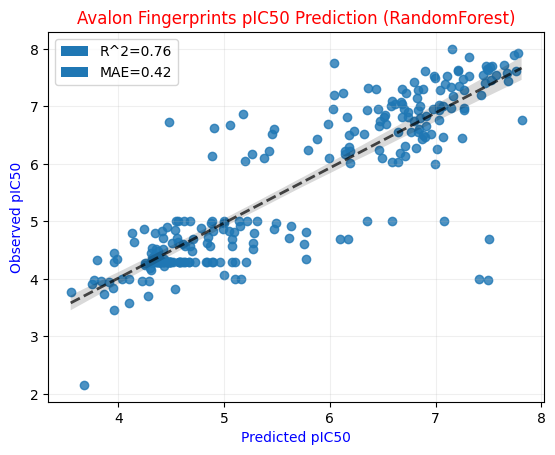

In [51]:
# Suppress specific LightGBM warnings
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')

# Assuming Avalon_fpts and dataset are already defined
Avalon_fpts = generate_AVfpts(dataset['Structure'])

Avalon_fingerprints = pd.DataFrame(Avalon_fpts, columns=['Col_A_{}'.format(i + 1)
                                                        for i in range(Avalon_fpts.shape[1])])

X_train_av, X_test_av, y_train_av, y_test_av = train_test_split(Avalon_fingerprints,
                                                    dataset.pIC50, test_size=0.3, random_state=42)

# Expanded models list
models = {
    "LGBM": LGBMRegressor(n_estimators=800, random_state=42, verbose=-1),  # Suppress all warnings
    "RandomForest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=800, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=800, random_state=42, verbose=0),  # Suppress output
    "LinearRegression": LinearRegression(),
    "SVR": SVR(kernel='rbf')
}

best_model = None
best_r2 = -1
best_mae = float('inf')

for name, model in models.items():
    model.fit(X_train_av, y_train_av)
    predictions = model.predict(X_test_av)
    mae = mean_absolute_error(y_test_av, predictions)
    r2 = r2_score(y_test_av, predictions)

    print(f"{name} MAE: {round(mae, 2)}")
    print(f"{name} R^2: {round(r2, 2)}")

    if r2 > best_r2:
        best_r2 = r2
        best_mae = mae
        best_model = (name, model)

print(f"\nBest Model: {best_model[0]}")
print(f"Best R^2: {best_r2}")
print(f"Best MAE: {best_mae}")

# Visualization for the best model
sns.regplot(x=best_model[1].predict(X_test_av), y=y_test_av, line_kws={"lw": 2, 'ls': '--', 'color': 'black', "alpha": 0.7})
plt.xlabel('Predicted pIC50', color='blue')
plt.ylabel('Observed pIC50', color='blue')
plt.title(f"Avalon Fingerprints pIC50 Prediction ({best_model[0]})", color='red')
plt.grid(alpha=0.2)

r2_patch = mpatches.Patch(label="R^2={:04.2f}".format(best_r2))
mae_patch = mpatches.Patch(label="MAE={:04.2f}".format(best_mae))
plt.legend(handles=[r2_patch, mae_patch])
plt.show()